In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gymnasium as gym

from rl_projects.basic.utils import OPTIMAL_FROZEN_LAKE_POLICY, random_stochastic_policy
from rl_projects.basic.policy_evaluation import policy_evaluation

In [2]:
env = gym.make(
        'FrozenLake-v1',
        desc=None,
        map_name="4x4",
        is_slippery=False,
        success_rate=1.0/3.0,
        reward_schedule=(1, 0, 0),
        render_mode="ansi"
    )

mdp = env.unwrapped.P

In [3]:
def compute_Q_function(V, mdp, gamma=1.0):
    Q = np.zeros((len(mdp), len(mdp[0])), dtype=np.float64)

    for state in range(len(mdp)):
        for action in range(len(mdp[state])):
            for prob, next_state, reward, done in mdp[state][action]:
                Q[state, action] += prob * (reward + gamma * V[next_state] * (not done))
            
    return Q

def policy_improvement(V, mdp, gamma=1.0):
    Q = compute_Q_function(V, mdp, gamma)
    new_Q = np.zeros_like(Q)
    new_Q[np.arange(len(Q)), np.argmax(Q, axis=1)] = 1
    return new_Q

<Axes: >

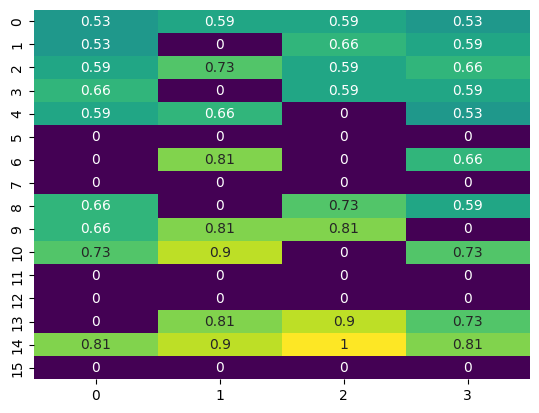

In [67]:
gamma = 0.9
optimal_V = policy_evaluation(OPTIMAL_FROZEN_LAKE_POLICY, mdp, gamma=gamma)
optimal_V
optimal_Q = compute_Q_function(optimal_V, mdp, gamma=gamma)
sns.heatmap(optimal_Q, annot=True, cmap="viridis", cbar=False)

In [6]:
np.array([None] * 9).reshape(3,3)

array([[None, None, None],
       [None, None, None],
       [None, None, None]], dtype=object)

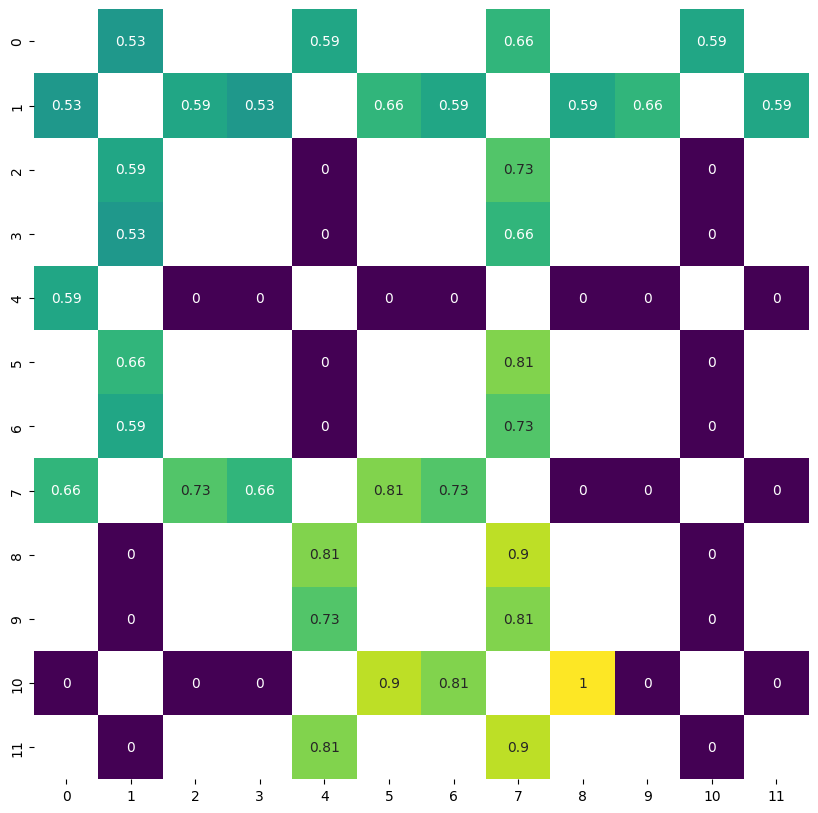

In [84]:
def visualize_Q_function(Q, ax=None):
    rows = [[] for _ in range(4)]
    for i, actions in enumerate(Q):
        current_row = i % 4
        action_block = np.array([None] * 9).reshape(3,3)
        action_block[0, 1] = actions[3]
        action_block[1, 0] = actions[0]
        action_block[1, 2] = actions[2]
        action_block[2, 1] = actions[1]
        action_block = action_block.astype(float)
        rows[current_row].append(action_block)
    
    board = np.concatenate([np.concatenate(row).T for row in rows])
    
    if ax is None:
        _, ax = plt.subplots(figsize=(10, 10))
    sns.heatmap(board.T, annot=True, cmap="viridis", cbar=False, ax=ax)

visualize_Q_function(optimal_Q)

In [82]:
rows = [[] for _ in range(4)]
for i, actions in enumerate(optimal_Q):
    current_row = i % 4
    print(actions, current_row)
    action_block = np.array([None] * 9).reshape(3,3)
    action_block[0, 1] = actions[3]
    action_block[1, 0] = actions[0]
    action_block[1, 2] = actions[2]
    action_block[2, 1] = actions[1]
    action_block = action_block.astype(float)
    rows[current_row].append(action_block)

board = np.concatenate([np.concatenate(row).T for row in rows])

[0.531441 0.59049  0.59049  0.531441] 0
[0.531441 0.       0.6561   0.59049 ] 1
[0.59049 0.729   0.59049 0.6561 ] 2
[0.6561  0.      0.59049 0.59049] 3
[0.59049  0.6561   0.       0.531441] 0
[0. 0. 0. 0.] 1
[0.     0.81   0.     0.6561] 2
[0. 0. 0. 0.] 3
[0.6561  0.      0.729   0.59049] 0
[0.6561 0.81   0.81   0.    ] 1
[0.729 0.9   0.    0.729] 2
[0. 0. 0. 0.] 3
[0. 0. 0. 0.] 0
[0.    0.81  0.9   0.729] 1
[0.81 0.9  1.   0.81] 2
[0. 0. 0. 0.] 3


<Axes: >

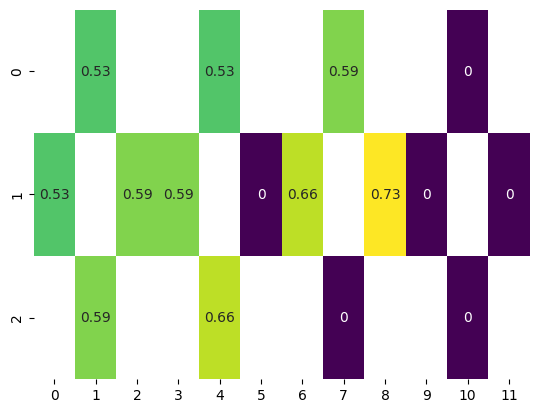

In [81]:
sns.heatmap(np.concatenate(rows[0], axis=1), annot=True, cmap="viridis", cbar=False)

<Axes: >

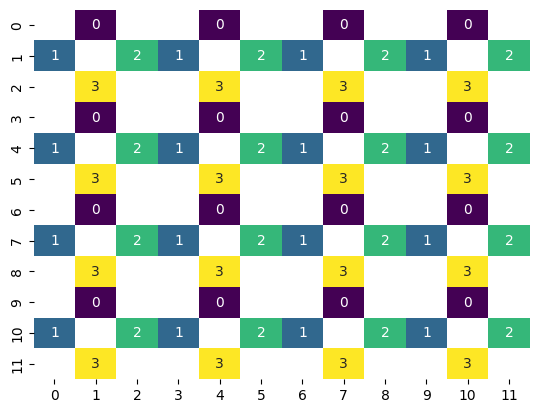

In [53]:
sns.heatmap(x, cbar=False, annot=True, cmap="viridis")

In [17]:
x.shape

(3, 15)

<Axes: >

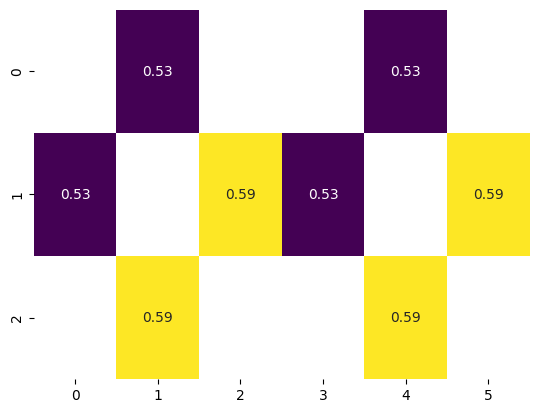

In [11]:
sns.heatmap(np.c_[action_block, action_block].astype(float), annot=True, cmap="viridis", cbar=False)

Text(0.5, 1.0, 'Value Function of Improved Policy')

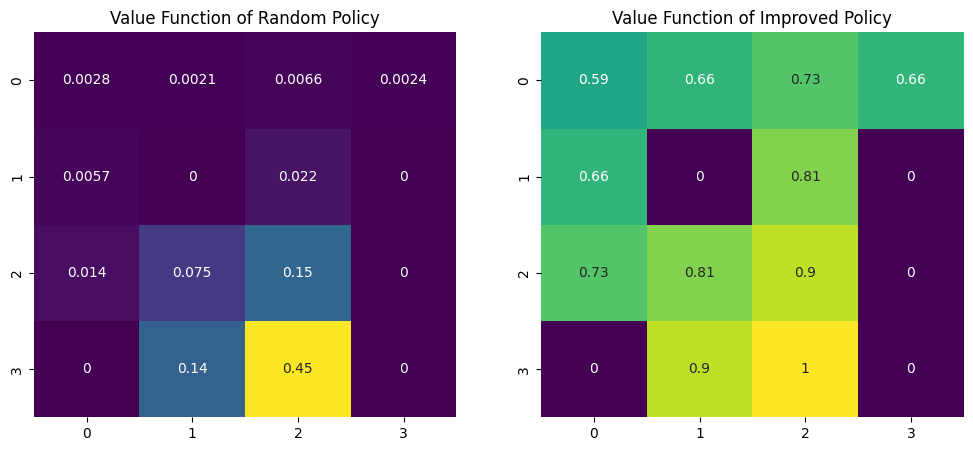

In [ ]:
random_policy = random_stochastic_policy(env)
random_V = policy_evaluation(random_policy, mdp, gamma=gamma)
random_V
new_random_policy = policy_improvement(random_V, mdp, gamma=gamma)
new_random_V = policy_evaluation(new_random_policy, mdp, gamma=gamma)

fig, axes = plt.subplots(2, 2, figsize=(12, 5))

sns.heatmap(random_V.reshape(4, 4), annot=True, cmap="viridis", cbar=False, ax=axes[0])
axes[0].set_title("Value Function of Random Policy")
sns.heatmap(new_random_V.reshape(4, 4), annot=True, cmap="viridis", cbar=False, ax=axes[1])
axes[1].set_title("Value Function of Improved Policy")

In [10]:
def policy_iteration(env, gamma=1.0, theta=1e-10):
    mdp = env.unwrapped.P
    policy = random_stochastic_policy(env)

    while True:
        old_policy = policy.copy()

        V = policy_evaluation(policy, mdp, gamma=gamma, theta=theta)

        policy = policy_improvement(V, mdp, gamma=gamma)

        if np.array_equal(policy, old_policy):
            break
    
    return V, policy

policy_iteration(env, gamma=gamma)


(array([0.59049, 0.6561 , 0.729  , 0.6561 , 0.6561 , 0.     , 0.81   ,
        0.     , 0.729  , 0.81   , 0.9    , 0.     , 0.     , 0.9    ,
        1.     , 0.     ]),
 array([[0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [1., 0., 0., 0.]]))